<a href="https://colab.research.google.com/github/AryaSuryaaa/Pengembangan-Machine-Learning/blob/main/Sub2Dicoding_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I Kadek Arya Surya Saputra**
<p>suryasaputra914@gmail.com</p>


<h2>Dicoding Belajar Pengembangan Machine Learning</h2>
<h3>Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series</h3>

<p>Study kasus, perkiraan cuaca pada kota london</p>
<p>Dataset : <a href="https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data">https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data</a></p>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('/Users/surya/Documents/Machine Learning/London Weather Data/london_weather.csv')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [ ]:
df['date'] = df['date'].astype(str)

# Membuat format dengan tanda "-"
df['dates'] = df['date'].apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:]}")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,dates
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05
...,...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN,2020-12-27
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN,2020-12-28
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN,2020-12-29
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN,2020-12-30


In [ ]:
df_new = df.drop(['date','cloud_cover','sunshine', 'global_radiation', 'max_temp', 'min_temp','precipitation','pressure','snow_depth'], axis=1)
df_new

,mean_temp,dates
0,-4.1,1979-01-01
1,-2.6,1979-01-02
2,-2.8,1979-01-03
3,-2.6,1979-01-04
4,-0.8,1979-01-05
...,...,...
15336,7.5,2020-12-27
15337,1.1,2020-12-28
15338,2.6,2020-12-29
15339,2.7,2020-12-30


In [ ]:
# menggunakan metode interpolasi linier untuk memperkirakan nilai yang hilang berdasarkan nilai di sekitarnya
df_new['mean_temp'].interpolate(method='linear', inplace=True) # karena sebelumnya ada data yang kosong

In [ ]:
# mengecek apakah ada nilai yang hilang dari dataset
df_new.isnull().sum() # tidak boleh ada data yang kosong

mean_temp    0
dates        0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_temp  15341 non-null  float64
 1   dates      15341 non-null  object 
dtypes: float64(1), object(1)
memory usage: 239.8+ KB


In [ ]:
dates = df_new['dates'].values
temp = df_new['mean_temp'].values

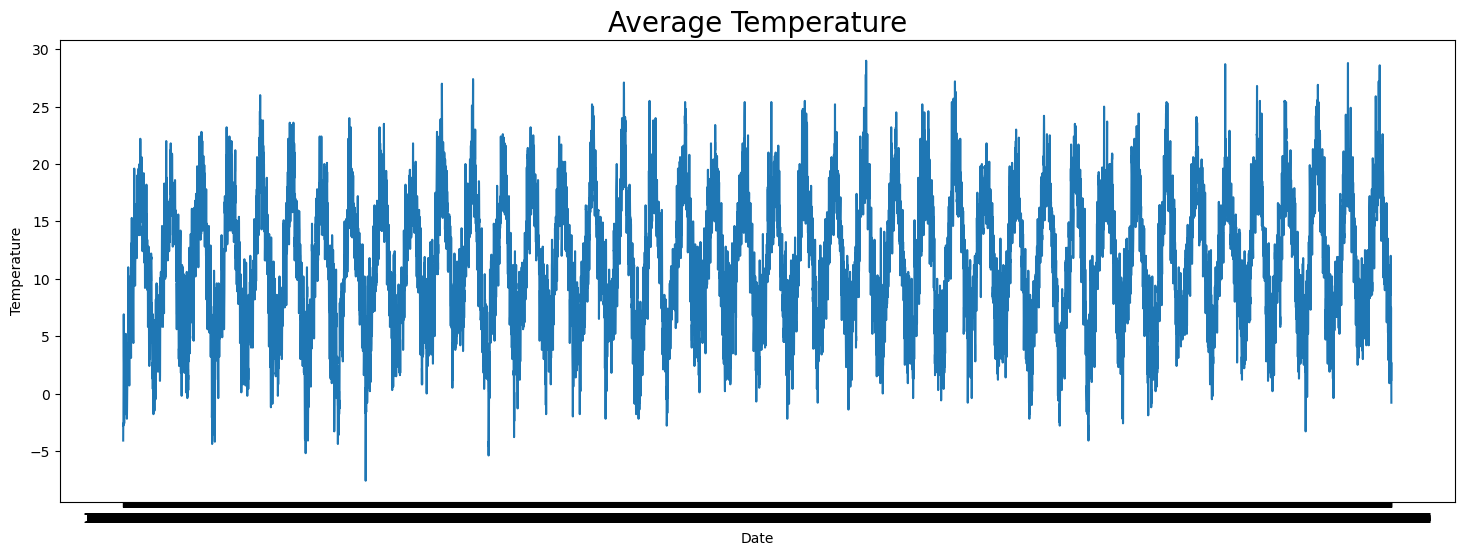

In [ ]:
# Membuat plot
plt.figure(figsize=(18, 6))
plt.plot(dates, temp)
plt.title('Average Temperature', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [ ]:
#  mengubah data kita menjadi format yang dapat diterima oleh model
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# mem bagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
dates_train, dates_test, avgtemp_train, avgtemp_test = train_test_split(dates, temp, test_size=0.2, shuffle=False)
print(len(avgtemp_train), len(avgtemp_test))

12272 3069


In [ ]:
data_x_train = windowed_dataset(avgtemp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
data_x_test = windowed_dataset(avgtemp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True, input_shape=(None, 1)),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.1)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
max = df['mean_temp'].max()
print('Max value: ' )
print(max)
min = df['mean_temp'].min()
print('Min Value: ')
print(min)

Max value: 
29.0
Min Value: 
-7.6


In [ ]:
# Mendapatkan 10% skala data
x = (max - min) * (10 / 100)
print(x)

3.66


In [ ]:
# callback
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print('\nFor Epoch', epoch, ' training has been stopped.''\n Because MAE of the model has reach < 10% of data scale')
callbacks = CallBack()

In [ ]:
history = model.fit(data_x_train ,epochs=100, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/100



123/123 [==============================] - 21s 122ms/step - loss: 3.3300 - mae: 3.7978 - val_loss: 2.6565 - val_mae: 3.1270
Epoch 2/100
122/123 [============================>.] - ETA: 0s - loss: 1.6728 - mae: 2.1229
For Epoch 1  training has been stopped.
 Because MAE of the model has reach < 10% of data scale
123/123 [==============================] - 14s 114ms/step - loss: 1.6725 - mae: 2.1225 - val_loss: 1.5713 - val_mae: 2.0161


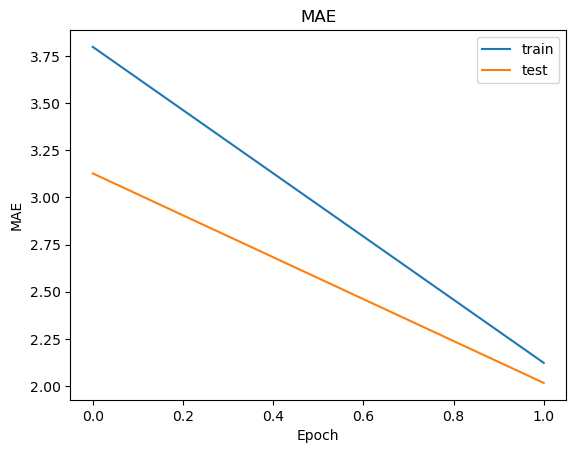

In [ ]:
# plot of mean absolute error
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

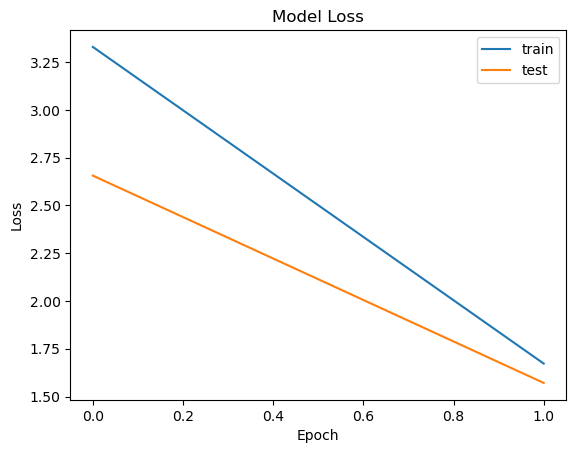

In [ ]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()